2025-10-30

# 学習内容
### 書籍/教材: スッキリわかるPythonによる機械学習入門
### 範囲: 第6章 回帰１：映画の興行収入の予測
### 目的: 映画の興行収入データをもとに、基本的な回帰によるデータ分析を実践する。

 -----------------------------
 ## <関数まとめ>
 ``` python
df.plot(),drop(),df[].index,df.loc[],LinearRegression(),mean_absolute_error(),model.coef_,model.intercept
 ```
 -----------------------------
## <内容まとめ>  

・**散布図**  
pythonのplot関数を使って散布図を表示し、外れ値がないか確認する。  
```python
df.plot(kind = 'scatter', x = 'x軸の列名', y = 'y軸の列名')
```  

・**特定の行の参照**  
下記のコードでAcolumn列の値が2未満の行だけを参照している。test['Acolumn'] < 2より比較結果はbool型であるから、各行がTrueかFalseのどちらかの値をもつシリーズに置き換わる。この場合Trueとなるのは1だけであるため0行目のみ表示される。  
```python
test = pd.DataFrame(
{
    'Acolumn':[1,2,3] 
}
)
test[test['Acolumn'] < 2]
```
以下が条件によるデータフレームの行の検索をするひな形である。  
```python
df[df[列名]　比較演算子　値]
```  

・**二つの条件で外れ値の行を特定する。**  
以下の二つのルールを守る。  
１.bool型のシリーズに置き換わる部分を()で囲う。  
２.「かつ」は&、「または」は|で記述。  
```python
df[(df['SNS2'] > 1000) & (df['sales'] < 8500)]
```
下記のようにすることでインデックスを取り出せる。  
```python
no = df[(df['SNS2'] > 1000) & (df['sales'] < 8500)].index
```

・**行の削除**
```python
df.drop(インデックス,axis = 0)
```

・**列の削除**
```python
df.drop('列名',axis = 1)
```

・**特定の行と列の取り出し**    
複数行および複数列を取り出すときは、インデックスのリストおよび列名のリストを作成して引数に渡す。  
インデックス名のところを:とすることで全ての行を指定できる。  
```python
df.loc[インデックス名, 列名]
```

・**スライス構文による要素参照**  
pythonの基本文法のリストでは、スライス構文で連続した要素を指定できる。リスト[A:B]とすれば、添え字がA以上B未満の要素を取り出すことが可能。  
```python
sample = [1,5,21,54]
sample[1:3]
# 実行結果
[5,21]
```

・**データフレームのloc機能とスライス構文による複数のインデックスおよび列の参照**  
以下は、データフレームのインデックス0以上3以下、最初の列からactor列までを参照するコード。  
このとき、リストとは異なりA:BはA以上B以下をしていることに注意。  
```python
df.loc[0:3, :'actor']
```

・**線形回帰分析の概要** ※**大事!**  
回帰モデルでは与えられた特徴量をもとに正解の数値データを予測する。モデルに教師データを与えることで、予測するための計算公式を自動で見つけてくれる。この計算公式を**回帰式**という。また特徴量が一つだけの式を作成する回帰手法を**線形単回帰分析**または**単回帰分析**という。特徴量が二つ以上の場合は**線形重回帰分析**または**重回帰分析**という。単回帰分析と重回帰分析は本質的には同じ線形回帰分析であり、以下のような予測計算式を作る教師あり学習のことである。   
```
予測値 = A×(特徴量1) + B×(特徴量2) + ... + 定数
```

・**最小二乗法**    
回帰式は最小二乗法という理論に基づいて作られる。散布図のデータのできるだけ中心を通るような直線を引く。これを回帰直線という。（直線なのでy=ax+bで表せる。）しかし回帰直線と実際のデータにはずれがあり、予測と誤差があるということがわかる。ここで各データの誤差を二乗して平均を求めてみる。(ここでは三つのデータにより求まる誤差$e_1,e_2,e_3$を使って考える。)  
$$
E = \frac{e_1^2 + e_2^2 + e_3^2}{3}
$$
Eのことを**平均二乗誤差**といい、この値が小さいということは「予測結果と実際の結果の誤差が少ない」ということを意味する。すなわち、平均二乗誤差Eができるだけ小さくなるような計算式の係数a,bを求める（図的には誤差が最も小さくなるような回帰直線を引く）というのが、平均二乗法の基本的なアプローチ。  

・**LinearRegression関数による重回帰モデルの作成と学習**    
今回はtreeモジュールではなく、linear_modelから重回帰モデルのLinearRegression関数をインポートする。  
```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
```

・**平均絶対誤差**  
回帰モデルでは、予測と実際の値の誤差がどのていど生じたのかを、予測性能の指標とする。ここで回帰モデルを作るときに使った平均二乗誤差(MSE)をそのまま利用することができる。また似たような評価指標として、**平均絶対誤差(MAE)**がある。平均二乗誤差は、差分の二乗の平均値をとったのに対して、平均絶対誤差は差分の絶対値の平均値をとる。  

・平均絶対誤差（MAE）を求める。  
```python
from sklearn.metrics import mean_absolute_error
pred = model.predict(x_test)
mean_absolute_error(y_pred = pred, y_true = y_test)
```
今回の場合、MAEは約277(万円)である。映画の興行収入は、大ヒットすると数十億円～数百億円となるため、277万円という誤差はとても小さいと言える。したがって予測性能は高いと評価できる。このように平均絶対誤差を評価するためには、その正解データに対する専門知識が必要となる。  

・**決定係数**  
決定係数(R-squared)とは、0~1の間の値をとり、その値が大きいほど予測値と実測値の誤差が少ない計算式であることを意味する、回帰モデルの評価指標の一つ。MAEとは異なり、正解データの知識がなくても予測性能を評価できる。一般的に0.8以上あれば、予測性能が高い良い計算式であると言われている。scikit-learnにおける回帰モデルのscoreメソッドは、正解率ではなくこの決定係数を返すようになっている。  

・計算式の係数と切片の確認  
係数をcoef_,切片をintercept_で確認する。  
```python
print(model.coef_)
print(model.intercept_)
```
各係数に列(変数)を対応させて表示するには以下のようにする。  
```python
tmp = pd.DataFrame(model.coef_)
tmp.index = x_train.columns
tmp
```


 -----------------------------
## まとめ

・回帰では、散布図を用いて外れ値を確認する。  
・回帰モデルでは、予測するための計算式である回帰式を自動で見つけてくれる。  
・回帰モデルは、平均絶対誤差や平均二乗誤差を用いて評価する。  

--------------------------------------
## 以下は実装コード例

In [2]:
import pandas as pd
df = pd.read_csv('chap06/cinema.csv')
df.head(3)

,cinema_id,SNS1,SNS2,actor,original,sales
0,1375,291.0,1044,8808.994029,0,9731
1,1000,363.0,568,10290.709370,1,10210
2,1390,158.0,431,6340.388534,1,8227


In [3]:
df.isnull().any(axis = 0)

cinema_id    False
SNS1          True
SNS2         False
actor         True
original     False
sales        False
dtype: bool

In [4]:
df2 = df.fillna(df.mean())
df2.isnull().any(axis = 0)

cinema_id    False
SNS1         False
SNS2         False
actor        False
original     False
sales        False
dtype: bool

<Axes: xlabel='SNS2', ylabel='sales'>

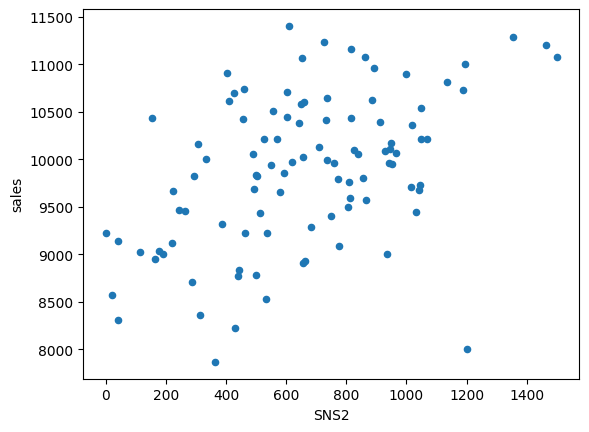

In [5]:
df2.plot(kind = 'scatter', x = 'SNS2', y = 'sales')

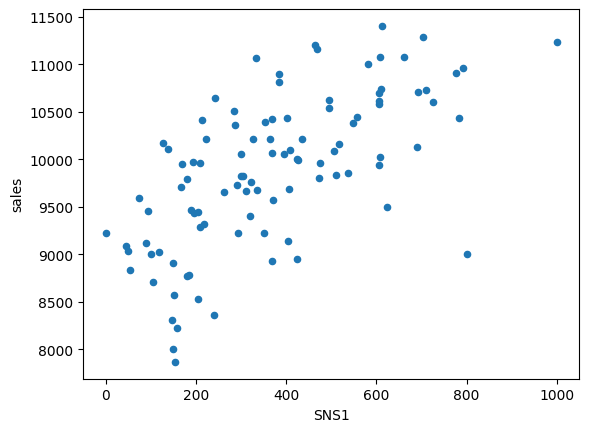

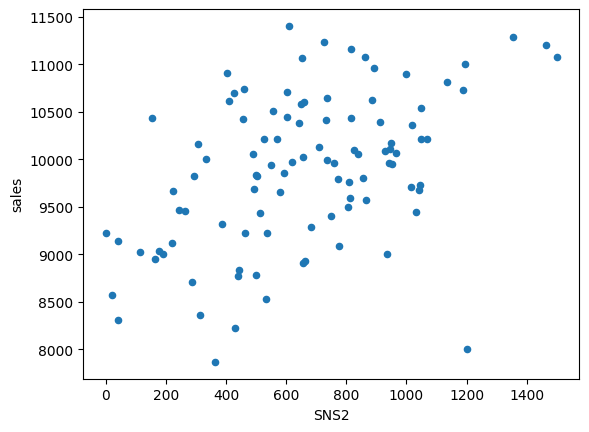

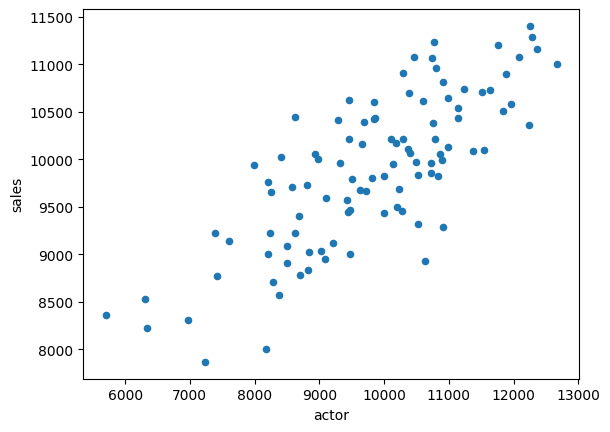

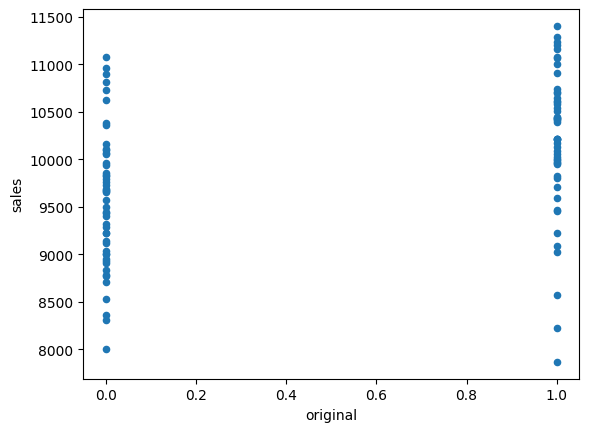

In [6]:
for name in df2.columns:
    if name == 'cinema_id' or name == 'sales':
        continue
    df2.plot(kind = 'scatter', x = name, y = 'sales')

In [7]:
test = pd.DataFrame(
{
    'Acolumn':[1,2,3] 
}
)

In [8]:
test[test['Acolumn'] < 2]

,Acolumn
0,1


In [9]:
test['Acolumn'] < 2

0     True
1    False
2    False
Name: Acolumn, dtype: bool

In [10]:
# 外れ値の行特定
df[(df['SNS2'] > 1000) & (df['sales'] < 8500)]

,cinema_id,SNS1,SNS2,actor,original,sales
30,1855,149.0,1200,8173.096892,0,8000


In [11]:
# 外れ値の行を削除
no = df2[(df2['SNS2'] > 1000) & (df2['sales'] < 8500)].index # 外れ値のデータを検索してインデックスを取得
df3 = df2.drop(no, axis = 0) # インデックスの行を削除してdf3に代入
df3.shape
# 下記の実行結果より100あった行が1減っていることが分かる。

(99, 6)

<Axes: xlabel='SNS2', ylabel='sales'>

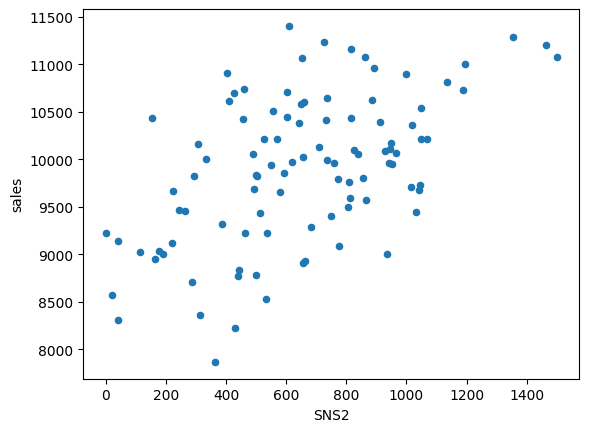

In [12]:
# 下記の散布図より外れ値が消えていることが確認できる。
df3.plot(kind = 'scatter', x = 'SNS2', y = 'sales')

In [13]:
# 既習の方法での訓練データと正解データへの分割
col = ['SNS1','SNS2','actor','original']
x = df3[col]
t = df3['sales']

In [14]:
# 特定のデータのみを参照
index = [2,4,6]
col = ['SNS1','actor']
df3.loc[index,col]

,SNS1,actor
2,158.0,6340.388534
4,209.0,10908.539550
6,153.0,7237.639848


In [15]:
# スライス構文を使った応用
df.loc[0:3, :'actor']

,cinema_id,SNS1,SNS2,actor
0,1375,291.0,1044,8808.994029
1,1000,363.0,568,10290.709370
2,1390,158.0,431,6340.388534
3,1499,261.0,578,8250.485081


In [16]:
# locとスライス構文を使った訓練データと正解データへの分割
x = df3.loc[ : , 'SNS1':'original']
t = df3['sales']

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, t, test_size = 0.2,random_state = 0)

In [18]:
# linear_modelからLinearRegressionのインポート
from sklearn.linear_model import LinearRegression
# モデルの作成
model = LinearRegression()
# 学習の実行
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
new = pd.DataFrame([[150,700,300,0]],columns = x_train.columns)
model.predict(new)

array([6874.109753])

In [20]:
model.score(x_test,y_test)

0.7903881596570088

In [21]:
# 平均絶対誤差を求める
from sklearn.metrics import mean_absolute_error
pred = model.predict(x_test)
mean_absolute_error(y_pred = pred, y_true = y_test)

277.1223696408627

In [22]:
import pickle
with open('chap06/cinema.pkl', 'wb') as f:
    pickle.dump(model,f)

In [23]:
# 係数と切片の確認
print(model.coef_)
print(model.intercept_)

[  1.07645622   0.53400191   0.28473752 213.95584503]
6253.418729438707


In [26]:
# 列と係数の表示
tmp = pd.DataFrame(model.coef_)
tmp.index = x_train.columns
tmp

,0
SNS1,1.076456
SNS2,0.534002
actor,0.284738
original,213.955845


上記より、計算式は次の通り
興行収入 = 
1.1 × (SNS1) + 0.5 × (SNS2) + 0.3 × (actor) + 214 × (original) + 6253.4